In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

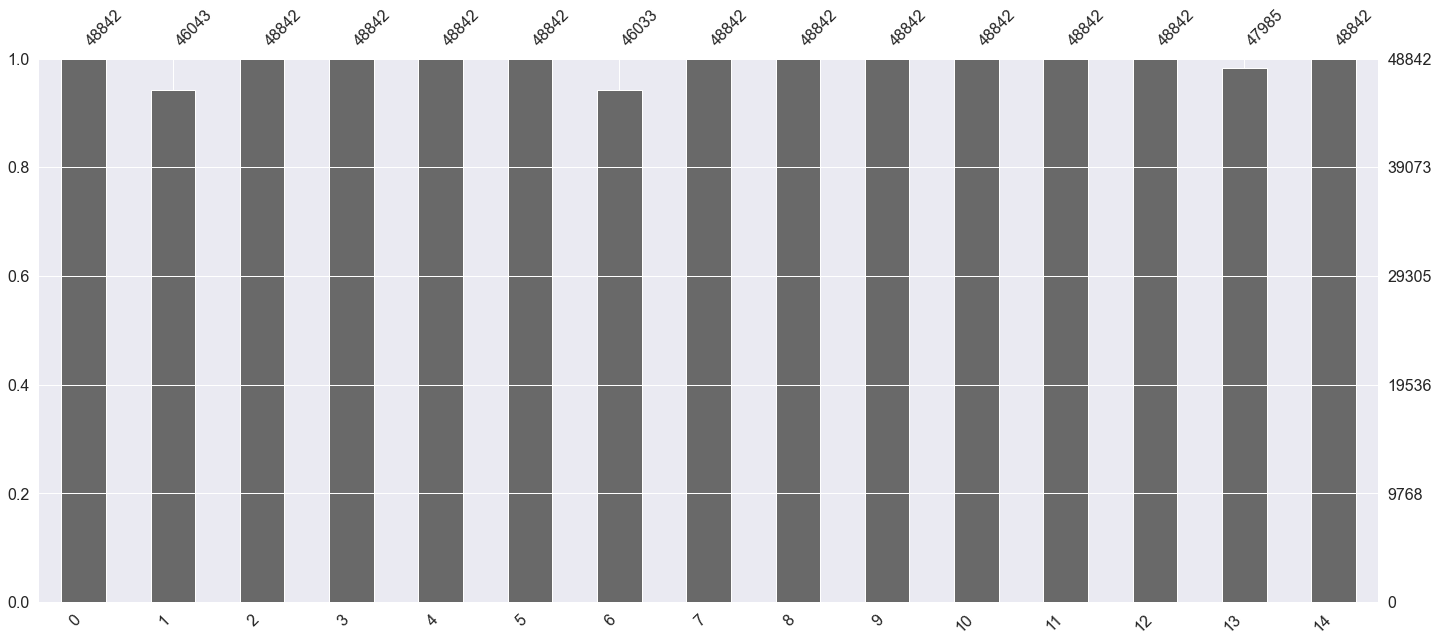

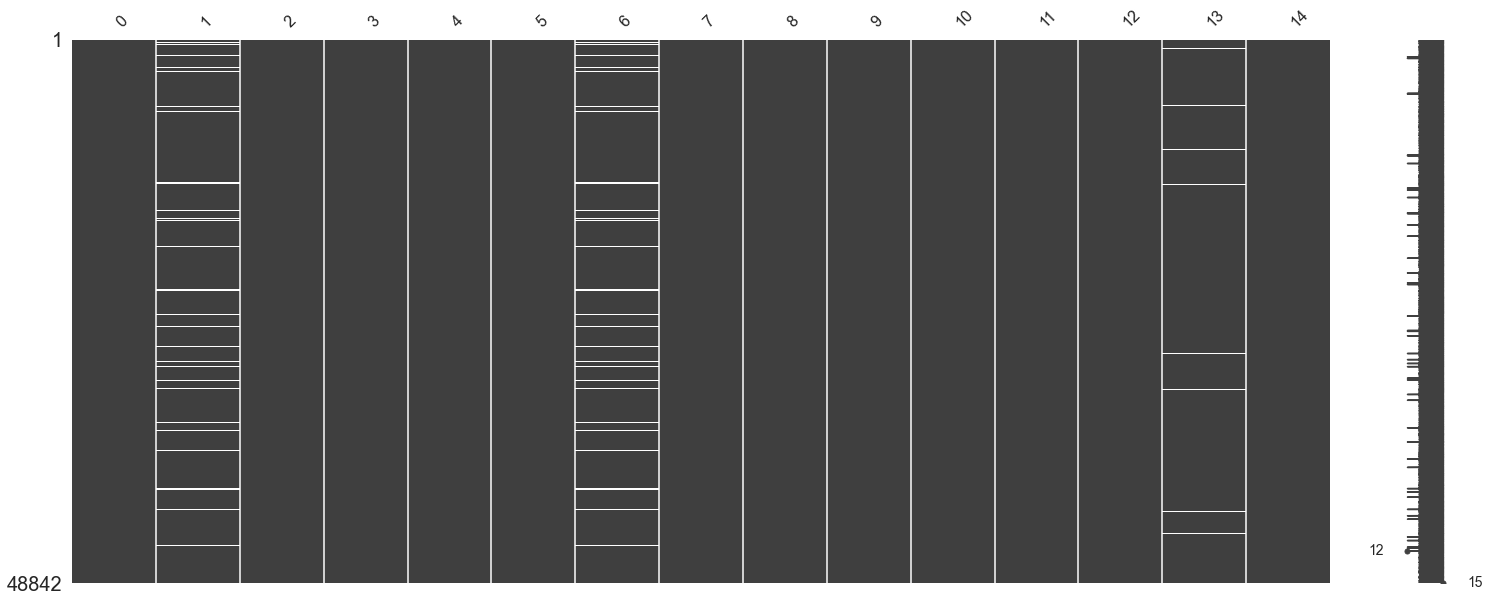

In [35]:
# reading csv files
df =  pd.read_csv('adult.data', sep=",", header=None, skipinitialspace=True)
df2 = pd.read_csv('adult.test', sep=",", header=None, skipinitialspace=True)

# Join the data and test files together
df = pd.concat([df, df2])

# Shuffle the rows
df = df.sample(frac=1).reset_index(drop=True)

# Replace all of ? with None
df = df.replace(['?'], [None])

#Visualising number of entries per column 
msno.bar(df)
#Visualising missing data 
msno.matrix(df)

# Drop all rows with None in them
df = df.dropna(axis=0)

# Check no None values remain
df.isnull().sum()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,20,Private,358355,9th,5,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K.
2,43,Self-emp-inc,133060,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
3,36,Private,186531,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K.
4,48,Private,39530,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,32,Private,426431,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K.


In [4]:
#Creating a copy of our data frame 
import copy
data = copy.deepcopy(df)
r = data.corr()
print(r)

#Adding column headers to our data 
data.columns = ["Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-status", "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", "Hours-per-week", "Native-country", "Income"]


          0         2         4         10        11        12
0   1.000000 -0.075792  0.037623  0.079683  0.059351  0.101992
2  -0.075792  1.000000 -0.041993 -0.004110 -0.004349 -0.018679
4   0.037623 -0.041993  1.000000  0.126907  0.081711  0.146206
10  0.079683 -0.004110  0.126907  1.000000 -0.032102  0.083880
11  0.059351 -0.004349  0.081711 -0.032102  1.000000  0.054195
12  0.101992 -0.018679  0.146206  0.083880  0.054195  1.000000


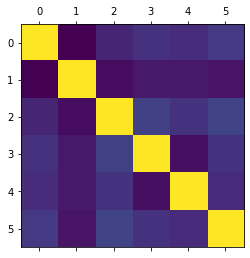

In [5]:
import matplotlib.pyplot as plt

plt.matshow(r)
plt.show()

In [6]:
#Education-num provides the information in terms of education level, therefore education column can be dropped 
del data["Education"]

In [7]:
#For the sake of correlation, the variables can be numerically encoded, however, when training algorithm, one-hot encoding must be used 

In [8]:
#Numerically encoding workclass

worklclass_mapping_dict = {
    "Private" : 0,
    "Self-emp-not-inc" : 1, 
    "Self-emp-inc" : 2, 
    "Federal-gov" : 3, 
    "Local-gov" : 4,
    "State-gov" : 5, 
    "Without-pay" : 6, 
    "Never-worked" : 7
}

data["Workclass"] = data["Workclass"].map(worklclass_mapping_dict)

In [9]:
#Numerically encoding marital status 

marital_status_mapping_dict = {
    "Married-civ-spouse" : 0, 
    "Divorced" : 1, 
    "Never-married" : 2, 
    "Widowed" : 3, 
    "Separated" :4, 
    "Married-spouse-absent" : 5, 
    "Married-AF-Spouse" : 6
}

data["Marital-status"] = data["Marital-status"].map(marital_status_mapping_dict)

In [10]:
#Numerically encoding occupation: Occupaiton is grouped into white collar and blue collar 
occupation_mapping_dict = {
    "Tech-support" : 0,
    "Craft-repair" : 1, 
    "Other-service" : 1, #Wasn't sure about blue or white collar for other services 
    "Sales" : 0, 
    "Exec-managerial" : 0, 
    "Prof-specialty" : 0, 
    "Handlers-cleaners" : 1, 
    "Machine-op-inspct" : 1, 
    "Adm-clerical" : 0, 
    "Farming-fishing" : 1, 
    "Transport-moving" : 1, 
    "Priv-house-serv" : 1, 
    "Protective-serv" : 1, 
    "Armed-Forces" : 1
    }

data["Occupation"] = data["Occupation"].map(occupation_mapping_dict)

In [11]:
#Numerically encoding the relationships 

relationship_mapping_dict = {
    "Wife" : 0, 
    "Own-child" : 1, 
    "Husband" : 2, 
    "Not-in-family" : 3, 
    "Other-relative" : 4, 
    "Unmarried" : 5
}

data["Relationship"] = data["Relationship"].map(relationship_mapping_dict)

In [12]:
#Numerically encoding the race variable 

race_mapping_dict = {
    "White" : 0,
    "Asian-Pac-Islander" : 1, 
    "Amer-Indian-Eskimo" : 2, 
    "Other" : 4, 
    "Black" : 5
    }

data["Race"] = data["Race"].map(race_mapping_dict)



In [13]:
#Numerically encoding the sex variable 

sex_mapping_dict = {
    "Male" : 0,
    "Female" : 1
    }

data["Sex"] = data["Sex"].map(sex_mapping_dict)

In [14]:
#Numerically encoding the native country variable 
country_mapping_dict = {
    "United-States" : 0,
    "Cambodia" :2,
    "England" : 3,
    "Puerto-Rico" : 0,
    "Canada" : 0, 
    "Germany" : 3, 
    "Outlying-US(Guam-USVI-etc)" : 0, 
    "India" : 2,
    "Japan" : 2, 
    "Greece" : 3, 
    "South" : 2, #assumes this was South Korea
    "China" : 2, 
    "Cuba" : 0, 
    "Iran" : 2,
    "Honduras" : 0,
    'Philippines' : 2, 
    'Italy' : 3,
    'Poland' : 3, 
    'Jamaica' : 0, 
    'Vietnam' : 2,
    'Mexico' : 0, 
    'Portugal' : 3, 
    'Ireland' : 3, 
    'France' : 3, 
    'Dominican-Republic' : 0, 
    'Laos' : 2, 
    'Ecuador' : 1,
    'Taiwan' : 2, 
    'Haiti' : 0,
    'Columbia' : 1, 
    'Hungary' : 3, 
    'Guatemala' : 0, 
    'Nicaragua' : 0, 
    'Scotland' : 3, 
    'Thailand' : 2, 
    'Yugoslavia' : 3, 
    'El-Salvador' : 0, 
    'Trinadad&Tobago' : 1, 
    'Peru' : 1, 
    'Hong' : 2, #This is assuming that Hong refers to Hong Kong
    'Holand-Netherlands' :3
}

data["Native-country"] = data["Native-country"].map(country_mapping_dict)

In [15]:
#Encoding income variable

income_mapping_dict = {
    "<=50K" : 0,
    ">50K" : 1, 
    "<=50K." : 0, 
    ">50K." : 1
    }

data["Income"] = data["Income"].map(income_mapping_dict)

In [16]:
#pandas data["column"].astype("uint8")

In [17]:
#Every variable should be numerically encoded, and ready to create a correlation matrix 
#This block will be used to figure out the correlation between variables once I figure out how to 
r = data.corr()

<AxesSubplot:>

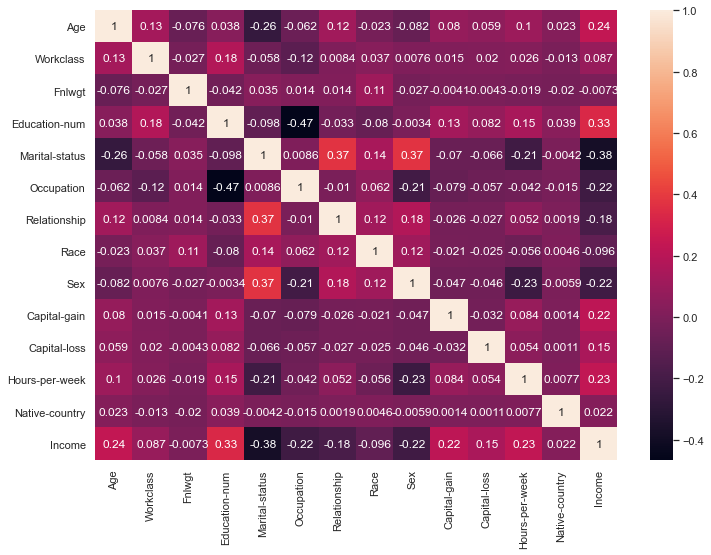

In [18]:
import seaborn as sns 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(r, annot=True)

In [19]:
#Will now employ one-hot encoding for : Work-class, Marital Status , Relationship, Native-Country
from sklearn.feature_extraction import DictVectorizer
onehot_encoder = DictVectorizer() 

In [20]:
#One-hot encoding for Workclas
workclass_instances = [
    {"workclass" : "0"}, 
    {"workclass" : "1"},
    {"workclass" : "2"}, 
    {"workclass" : "3"},
    {"workclass" : "4"}, 
    {"workclass" : "5"},
    {"workclass" : "6"}, 
    {"workclass" : "7"}
]

onehot_encoder.fit_transform(workclass_instances).toarray()



array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [21]:
# Find X and y values - selecting only important features for X
X = df.iloc[:, [0, 4, 6, 8, 9, 12, 13]]
y = df.iloc[:, [14]]
X.columns = ['Age', 'Education', 'Occupation', 'Race', 'Sex', 'Hours-per-week', 'Native-country']
y.columns = ['Income']
print(y)
X


       Income
0      <=50K.
2       <=50K
3      <=50K.
4       <=50K
5      <=50K.
...       ...
48836  <=50K.
48837   <=50K
48838   <=50K
48839   <=50K
48840   <=50K

[45222 rows x 1 columns]


,Age,Education,Occupation,Race,Sex,Hours-per-week,Native-country
0,20,5,Machine-op-inspct,White,Female,40,United-States
2,43,9,Craft-repair,White,Male,40,United-States
3,36,9,Craft-repair,White,Male,60,United-States
4,48,9,Adm-clerical,White,Female,40,United-States
5,32,10,Sales,White,Male,40,United-States
...,...,...,...,...,...,...,...
48836,42,10,Tech-support,White,Male,40,United-States
48837,20,11,Other-service,White,Male,40,United-States
48838,47,14,Prof-specialty,White,Female,40,United-States
48839,43,14,Prof-specialty,White,Female,40,United-States


In [22]:
# Convert categorical data to numerical
mapping_dict = {'Male' : '0','Female' : '1'}
X['Sex'] = (X['Sex'].map(mapping_dict))

mapping_dict = {'White' : '0','Asian-Pac-Islander' : '1', 'Amer-Indian-Eskimo' : '2', 'Other' : '3', 'Black' : '4'}
X['Race'] = (X['Race'].map(mapping_dict))

# Convert countries to numerical value, grouped countries into continents.
# North America = 0, South America = 1, Asia = 2, Europe = 3, 
mapping_dict = {'United-States' : '0', 'Cambodia' : '2', 'England' : '3', 'Puerto-Rico' : '0', 'Canada' : '0', 'Germany' : '3', 'Outlying-US(Guam-USVI-etc)' : '0', 'India' : '2', 'Japan' : '2', 'Greece' : '3', 'South' : '??????????', 'China' : '2', 'Cuba' : '0', 'Iran' : '2', 'Honduras' : '0', 'Philippines' : '2', 'Italy' : '3', 'Poland' : '3', 'Jamaica' : '0', 'Vietnam' : '2', 'Mexico' : '0', 'Portugal' : '3', 'Ireland' : '3', 'France' : '3', 'Dominican-Republic' : '0', 'Laos' : '2', 'Ecuador' : '1', 'Taiwan' : '2', 'Haiti' : '0', 'Columbia' : '1', 'Hungary' : '3', 'Guatemala' : '0', 'Nicaragua' : '0', 'Scotland' : '3', 'Thailand' : '2', 'Yugoslavia' : '3', 'El-Salvador' : '0', 'Trinadad&Tobago' : '1', 'Peru' : '1', 'Hong' : '????????', 'Holand-Netherlands' : '3', '?' : '?'}
X['Native-country'] = (X['Native-country'].map(mapping_dict))

# Convert occupation to white collar or blue collar:
# White collar = 0, Blue collar = 1
mapping_dict = {'Tech-support' : '0', 'Craft-repair' : '1', 'Other-service' : '??????', 'Sales' : '0', 'Exec-managerial' : '0', 'Prof-specialty' : '0', 'Handlers-cleaners' : '1', 'Machine-op-inspct' : '1', 'Adm-clerical' : '0', 'Farming-fishing' : '1', 'Transport-moving' : '1', 'Priv-house-serv' : '1', 'Protective-serv' : '1', 'Armed-Forces' : '1'}
X['Occupation'] = (X['Occupation'].map(mapping_dict))


# Convert y into numerical: <50k = 0, >50k = 1
mapping_dict = {'<=50K' : '0', '>50K' : '1', '<=50K.' : '0', '>50K.' : '1'}
y['Income'] = (y['Income'].map(mapping_dict))


<ipython-input-22-2e034a1d92ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = (X['Sex'].map(mapping_dict))
<ipython-input-22-2e034a1d92ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Race'] = (X['Race'].map(mapping_dict))
<ipython-input-22-2e034a1d92ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [23]:
y.isnull().sum()

Income    0
dtype: int64

In [24]:
# Group ages into discrete bins
bins = [10,20,30,40,50,60,70,80,90]
X['Age'] = pd.cut(X['Age'], bins)

<ipython-input-24-7daf74c18ede>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = pd.cut(X['Age'], bins)


In [25]:
pd.value_counts(X['Age'])

(30, 40]    12291
(20, 30]    11292
(40, 50]     9990
(50, 60]     5833
(10, 20]     2968
(60, 70]     2212
(70, 80]      522
(80, 90]      114
Name: Age, dtype: int64

In [26]:
X

,Age,Education,Occupation,Race,Sex,Hours-per-week,Native-country
0,"(10, 20]",5,1,0,1,40,0
2,"(40, 50]",9,1,0,0,40,0
3,"(30, 40]",9,1,0,0,60,0
4,"(40, 50]",9,0,0,1,40,0
5,"(30, 40]",10,0,0,0,40,0
...,...,...,...,...,...,...,...
48836,"(40, 50]",10,0,0,0,40,0
48837,"(10, 20]",11,??????,0,0,40,0
48838,"(40, 50]",14,0,0,1,40,0
48839,"(40, 50]",14,0,0,1,40,0


In [27]:
y

,Income
0,0
2,0
3,0
4,0
5,0
...,...
48836,0
48837,0
48838,0
48839,0


In [28]:
(X['Age'].value_counts().index.tolist())[0]
print(X['Age'].iloc[0])

(10, 20]


<ipython-input-29-2c97e2081abc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XVisual['y'] = y
<ipython-input-29-2c97e2081abc>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','(10-20]','(20-30]','(30-40]','(40-50]','(50-60]','(60-70]','(70-80]', '(80-90]'])


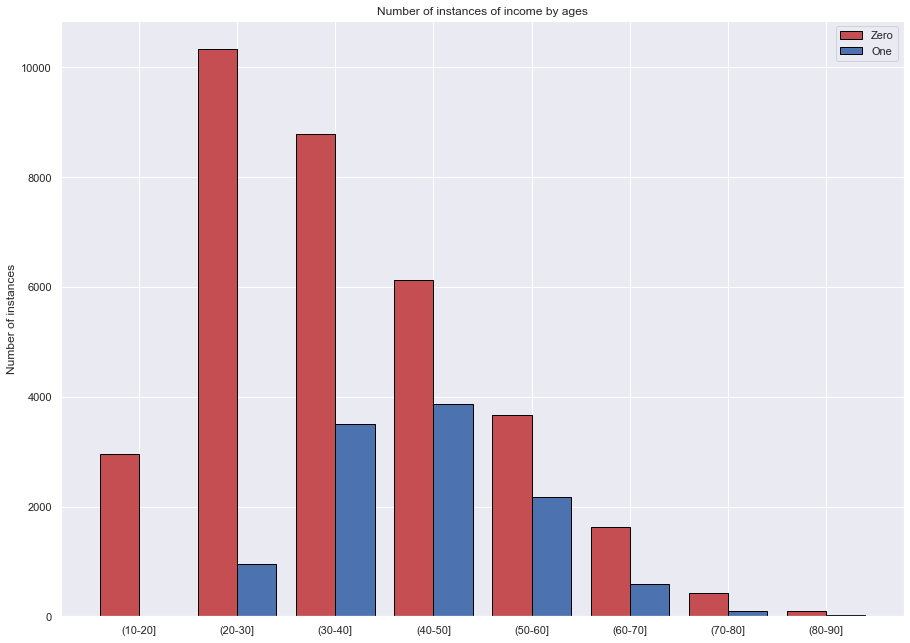

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Created copy of X table and added y column back to XVisual, to allow us to carry out below calculations
XVisual = X
XVisual['y'] = y

ages = []
lowest = 10
zero = []
one = []
       
# Goes through 
while len(ages) < 8:
    for i in range(8):
        if (XVisual['Age'].value_counts().index.tolist())[i].left == lowest:
            df_new = XVisual[XVisual['Age'] == (XVisual['Age'].value_counts().index.tolist())[i]]
            ages.append(df_new['Age'].iloc[0])
            zero.append(df_new['y'].value_counts()[0])
            one.append(df_new['y'].value_counts()[1])
            lowest += 10
            

# # Plots bar chart with zero and one on top of each other
# ind = ['(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
# width = 0.9
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(ind, zero, width, color='r', edgecolor = "black")
# ax.bar(ind, one, width, bottom=zero, color='b', edgecolor = "black")
# ax.set_ylabel('Number of instances')
# ax.set_title('Number of instances of income by ages')
# ax.legend(labels=['Zero', 'One'])
# plt.show()

# Plots bar chart with zero and one next to each other
ind = np.arange(len(ages))
# ind = ['(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
width = 0.4
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind-0.2, zero, width, color='r', edgecolor = "black")
ax.bar(ind+0.2, one, width, color='b', edgecolor = "black")
ax.set_ylabel('Number of instances')
ax.set_title('Number of instances of income by ages')
ax.legend(labels=['Zero', 'One'])
ax.set_xticklabels(['','(10-20]','(20-30]','(30-40]','(40-50]','(50-60]','(60-70]','(70-80]', '(80-90]'])
plt.show()

In [30]:
# print(X.head(50))
X.isnull().sum()

Age               0
Education         0
Occupation        0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
y                 0
dtype: int64

TypeError: '>=' not supported between instances of 'pandas._libs.interval.Interval' and 'int'

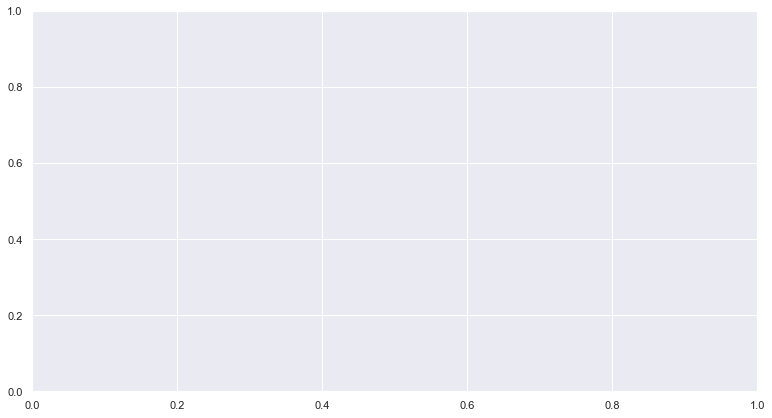

In [31]:
# Plot a histogram of 'medv' in y
fig = plt.figure(figsize=(13,7))
plt.hist(X['Age'], bins=50, range = (0, 100))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

In [ ]:
X

,Age,Education,Occupation,Race,Sex,Hours-per-week,Native-country
0,33,9,Protective-serv,0,0,37,0
2,28,6,Other-service,0,1,40,0
3,36,13,Exec-managerial,0,1,45,0
4,19,7,Handlers-cleaners,0,0,30,0
5,22,10,Machine-op-inspct,1,0,35,0
...,...,...,...,...,...,...,...
48836,19,9,Adm-clerical,0,1,35,0
48838,39,10,Machine-op-inspct,0,1,40,0
48839,41,15,Prof-specialty,0,0,45,0
48840,33,16,Prof-specialty,0,0,45,0


In [ ]:
print(X['Age'].value_counts())
print(X['Age'].value_counts().index.tolist())
y['Income'].values

# Data binning of ages into groups first

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
86       1
87       1
Name: Age, Length: 74, dtype: int64
[36, 33, 31, 35, 23, 34, 37, 30, 38, 28, 32, 41, 39, 27, 29, 40, 25, 24, 42, 26, 43, 46, 45, 47, 44, 22, 21, 20, 19, 51, 50, 48, 49, 52, 18, 53, 54, 55, 56, 58, 57, 17, 59, 60, 61, 62, 64, 63, 65, 67, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 90, 77, 80, 81, 78, 79, 82, 84, 83, 85, 88, 89, 86, 87]


array(['0', '0', '1', ..., '1', '1', '0'], dtype=object)

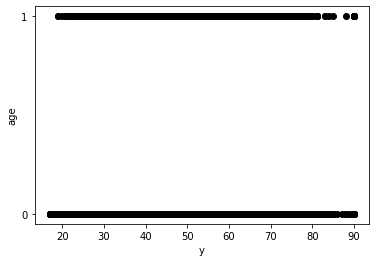

In [ ]:
plt.bar(X['Age'].values, y['Income'].values, color='black')
plt.xlabel("y")
plt.ylabel("age")
plt.show()

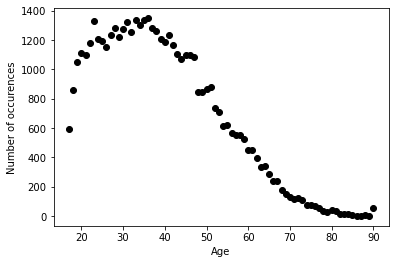

In [ ]:
X['Age'].value_counts().values
X['Age'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.scatter(X['Age'].value_counts().index.tolist(), X['Age'].value_counts().values, color='black')
plt.xlabel("Age")
plt.ylabel("Number of occurences")
plt.show()

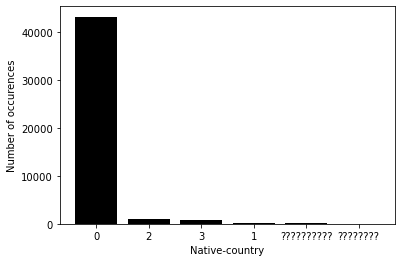

In [ ]:
X['Native-country'].value_counts().values
X['Native-country'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Native-country'].value_counts().index.tolist(), X['Native-country'].value_counts().values, color='black')
plt.xlabel("Native-country")
plt.ylabel("Number of occurences")
plt.show()

# Compare to graph of before you formed the continent categories.

# Shows that feature scaling is required?

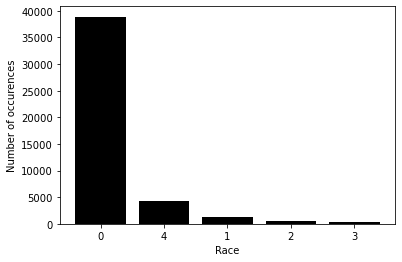

In [ ]:
X['Race'].value_counts().values
X['Race'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Race'].value_counts().index.tolist(), X['Race'].value_counts().values, color='black')
plt.xlabel("Race")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

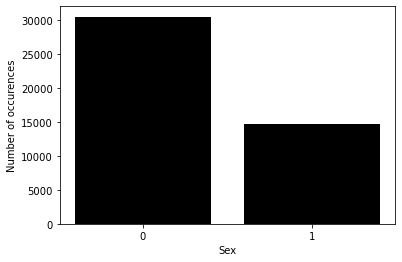

In [ ]:
X['Sex'].value_counts().values
X['Sex'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Sex'].value_counts().index.tolist(), X['Sex'].value_counts().values, color='black')
plt.xlabel("Sex")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?

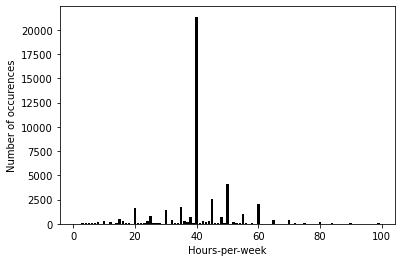

In [ ]:
X['Hours-per-week'].value_counts().values
X['Hours-per-week'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Hours-per-week'].value_counts().index.tolist(), X['Hours-per-week'].value_counts().values, color='black')
plt.xlabel("Hours-per-week")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required??????

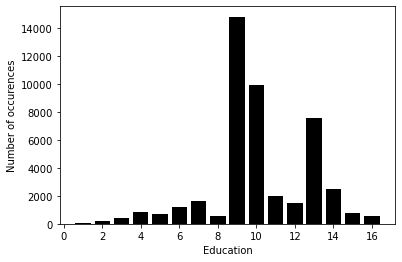

In [ ]:
X['Education'].value_counts().values
X['Education'].value_counts().index.tolist()

# Plotting the number of occurences of each age within the data
plt.bar(X['Education'].value_counts().index.tolist(), X['Education'].value_counts().values, color='black')
plt.xlabel("Education")
plt.ylabel("Number of occurences")
plt.show()

# Shows that feature scaling is required?